<a href="https://colab.research.google.com/github/nimalan-parameshwaran/CNN_Gender_Classification/blob/main/gender_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"nimalanparameshwaran","key":"bb32aaf484318377154d5de5e4da631e"}'}

In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d cashutosh/gender-classification-dataset

 96% 259M/269M [00:01<00:00, 186MB/s]
100% 269M/269M [00:01<00:00, 167MB/s]


In [ ]:
import zipfile

with zipfile.ZipFile('gender-classification-dataset.zip', 'r') as zip_ref:
    zip_ref.extractall('data')

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

%matplotlib inline
import os

In [ ]:
base_dir = "/content/data"
train_dir = "/content/data/Training"
validation_dir = "/content/data/Validation/"

train_male_dir = os.path.join(train_dir, "male")
train_female_dir = os.path.join(train_dir, "female")

valid_male_dir = os.path.join(validation_dir, "male")
valid_female_dir = os.path.join(validation_dir, "female")

In [ ]:
train_male_fnames = os.listdir(train_male_dir)
train_female_fnames = os.listdir(train_female_dir)

valid_male_fnames = os.listdir(valid_male_dir)
valid_female_fnames = os.listdir(valid_female_dir)

print("Training : ")
print(train_male_fnames[:10])
print(train_female_fnames[:10])
print("Validation : ")
print(valid_male_fnames[:10])
print(valid_female_fnames[:10])

Training : 
['198510.jpg.jpg', '134181.jpg.jpg', '141457.jpg.jpg', '093251.jpg.jpg', '103852.jpg.jpg', '100118.jpg.jpg', '148222.jpg.jpg', '152911.jpg.jpg', '157703.jpg.jpg', '156756.jpg.jpg']
['197195.jpg.jpg', '133490.jpg.jpg', '146763.jpg.jpg', '148656.jpg.jpg', '163287.jpg.jpg', '194040.jpg.jpg', '165469.jpg.jpg', '150939.jpg.jpg', '200838.jpg.jpg', '158740.jpg.jpg']
Validation : 
['088869.jpg.jpg', '073974.jpg.jpg', '074861.jpg.jpg', '080457.jpg.jpg', '066856.jpg.jpg', '080355.jpg.jpg', '078440.jpg.jpg', '075129.jpg.jpg', '085141.jpg.jpg', '069486.jpg.jpg']
['130526.jpg.jpg', '124127.jpg.jpg', '131224.jpg.jpg', '123361.jpg.jpg', '130126.jpg.jpg', '123352.jpg.jpg', '126582.jpg.jpg', '127012.jpg.jpg', '127653.jpg.jpg', '123384.jpg.jpg']


In [ ]:
print(f"total training of male is : {len(train_male_fnames)}")
print(f"total training of female is : {len(train_female_fnames)}")
print(f"total validation of male is : {len(valid_male_fnames)}")
print(f"total validation of female is : {len(valid_female_fnames)}")

total training of male is : 23766
total training of female is : 23243
total validation of male is : 5808
total validation of female is : 5841


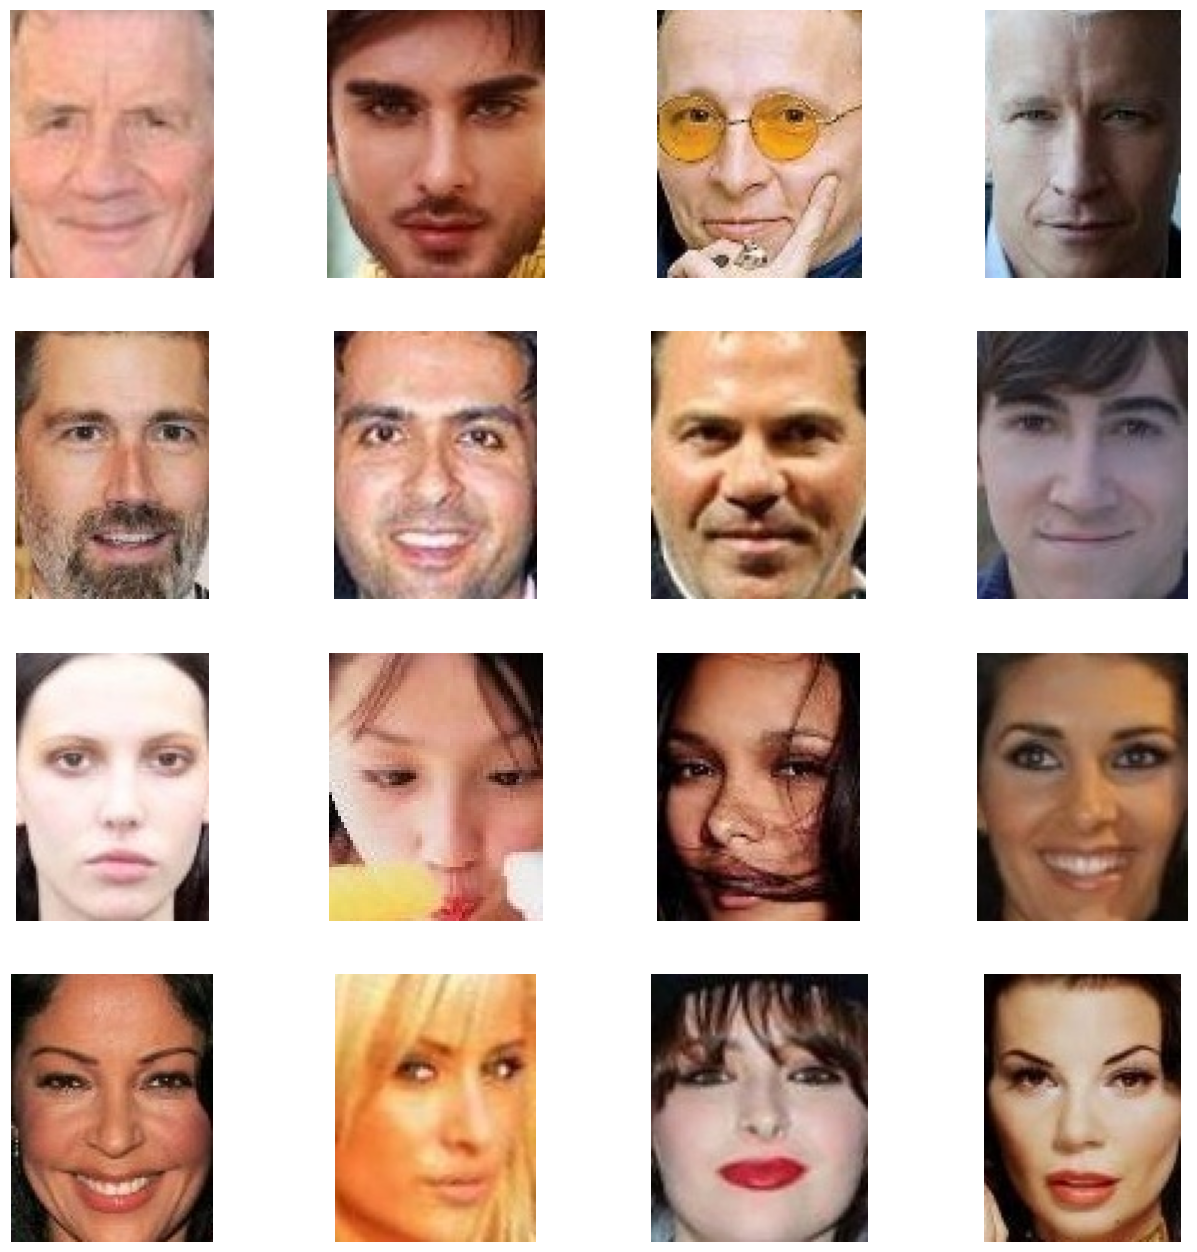

In [ ]:
nrows = 4
ncols = 4

pic_index = 0

fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
male_img = [os.path.join(train_male_dir, fname) for fname in train_male_fnames[pic_index-8 : pic_index]]
female_img = [os.path.join(train_female_dir, fname) for fname in train_female_fnames[pic_index-8 : pic_index]]


for i, img in enumerate(male_img + female_img):
    set_subplot = plt.subplot(nrows, ncols, i + 1)
    set_subplot.axis("Off")
    image = mpimg.imread(img)
    plt.imshow(image)
plt.show()


In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation="relu", input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(32, (3,3), activation="relu"),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64, (3,3), activation="relu"),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64, (3,3), activation="relu"),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation="relu"),
    tf.keras.layers.Dense(84, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 149, 149, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 147, 147, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 73, 73, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 35, 35, 64)       0

In [ ]:
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
train_datagen = ImageDataGenerator(rescale=1/255)
test_datagen = ImageDataGenerator(rescale=1/255)

training_generator = train_datagen.flow_from_directory(train_dir,
                                                      target_size=(300, 300),
                                                      batch_size=20,
                                                      class_mode="binary")

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                       target_size=(300, 300),
                                                       batch_size=20,
                                                       class_mode="binary")

Found 47009 images belonging to 2 classes.
Found 11649 images belonging to 2 classes.


In [ ]:
history = model.fit_generator(training_generator, steps_per_epoch=100, epochs=50,
                    validation_data=validation_generator,
                    validation_steps=50,
                    verbose=1)

Epoch 1/50


<ipython-input-14-17006aabd7af>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(training_generator, steps_per_epoch=100, epochs=50,


100/100 [==============================] - 21s 91ms/step - loss: 0.6679 - accuracy: 0.6150 - val_loss: 0.5322 - val_accuracy: 0.7470
Epoch 2/50
100/100 [==============================] - 6s 63ms/step - loss: 0.4853 - accuracy: 0.7805 - val_loss: 0.3416 - val_accuracy: 0.8560
Epoch 3/50
100/100 [==============================] - 6s 61ms/step - loss: 0.3510 - accuracy: 0.8555 - val_loss: 0.2560 - val_accuracy: 0.8990
Epoch 4/50
100/100 [==============================] - 6s 62ms/step - loss: 0.3614 - accuracy: 0.8490 - val_loss: 0.3039 - val_accuracy: 0.8790
Epoch 5/50
100/100 [==============================] - 7s 71ms/step - loss: 0.3236 - accuracy: 0.8525 - val_loss: 0.2924 - val_accuracy: 0.8710
Epoch 6/50
100/100 [==============================] - 7s 66ms/step - loss: 0.2636 - accuracy: 0.9015 - val_loss: 0.2476 - val_accuracy: 0.8960
Epoch 7/50
100/100 [==============================] - 7s 72ms/step - loss: 0.2450 - accuracy: 0.8990 - val_loss: 0.2018 - val_accuracy: 0.9230
Epoch 8/5

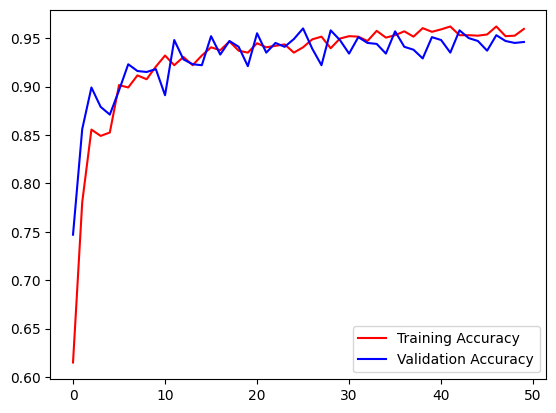

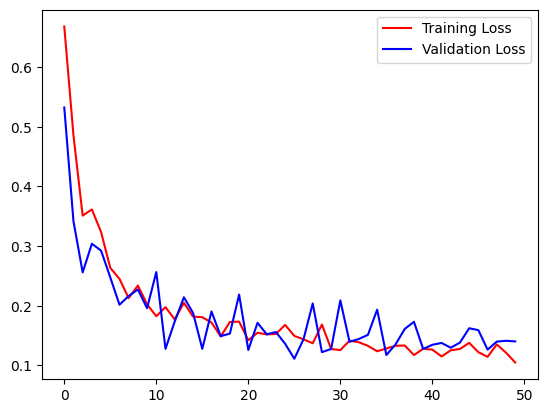

In [ ]:
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(len(acc))

plt.plot(epochs, acc, "r", label="Training Accuracy")
plt.plot(epochs, val_acc, "b", label="Validation Accuracy")

plt.legend()
plt.figure()

plt.plot(epochs, loss, "r", label="Training Loss")
plt.plot(epochs, val_loss, "b", label="Validation Loss")

plt.legend()
plt.show()

1/1 [==============================] - 0s 82ms/step
/content/download (3).jpeg This Is male


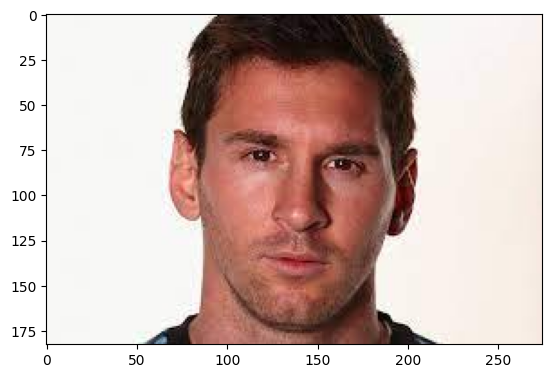

In [ ]:
path = "/content/download (3).jpeg"

img = load_img(path, target_size=(300, 300))
x = img_to_array(img)
x = np.expand_dims(x, axis=0)

model = load_model("model.h5")

predict_classes = model.predict(x)

if predict_classes[0] > 0.5:
    print(path + " This Is male")
else:
    print(path + " This Is female")

show_img = plt.imread(path)
plt.imshow(show_img)
plt.show()


1/1 [==============================] - 0s 83ms/step
/content/FMfufQ6agAAbRZA.jpeg This Is female


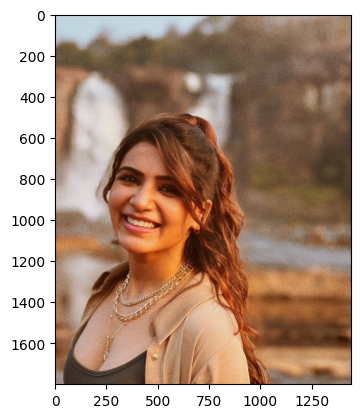

In [ ]:
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.models import load_model
import numpy as np

path = "/content/FMfufQ6agAAbRZA.jpeg"

img = load_img(path, target_size=(300, 300))
x = img_to_array(img)
x = np.expand_dims(x, axis=0)

model = load_model("model.h5")

predict_classes = model.predict(x)

if predict_classes[0] > 0.5:
    print(path + " This Is male")
else:
    print(path + " This Is female")

show_img = plt.imread(path)
plt.imshow(show_img)
plt.show()

